In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# from scikits import bootstrap as boot
import scipy
import custom_image_toolkit as c
import seaborn as sns

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
strain_db={'yFB29':r'pGAL1-WHI5-mVenNB', 'yFB30':r'pGAL1-WHI5-mVenNB, $\Delta$bck2',
           'yFB41':r'pWHI5-WHI5-mVenNB', 'yFB43':r'pWHI5-WHI5-mVenNB', 'yFB25':r'WT', 'yFB86':r'pGAL1-CLN3',
          'yFB45':r'pWHI5-WHI5-mVenNB, $\Delta$bck2', 'yFB46':r'pWHI5-WHI5-mVenNB, $\Delta$bck2',
           'yFB78':r'pGAL1-WHI5-mVenNB','yFB79':r'pWHI5-WHI5-mVenNB',
          'yFB93':r'WT MATa', 'yFB94':r'WT MAT$\alpha$', 'yFB95':r'WT MAT$\alpha$ -leu',
          'yFB96':r'$\Delta$whi5', 'yFB97':r'$\Delta$cln3', 'yFB98':'$\Delta$bck2',
          'yFB99':r'$\Delta$swe1', 'yFB100':r'$\Delta$cln3, $\Delta$whi5',
           'yFB101':r'$\Delta$whi5, $\Delta$bck2',
           'yFB102':r'$\Delta$whi5, $\Delta$cln3, $\Delta$bck2',
           'yFB103':r'$\Delta$whi5, $\Delta$bck2, $\Delta$swe1',
           'yFB104':r'$\Delta$whi5, $\Delta$cln3, $\Delta$bck2, $\Delta$swe1',
          'yFB108':r'$\Delta$whi5, $\Delta$cln3, $\Delta$swe1'}

In [5]:
expt_ids = ['/190403_timepoint', '/190417_timepoint', '/190607_timepoint', '/190322_timepoint']
for ind in range(len(expt_ids)):
    expt_id = expt_ids[ind]
    pickle_in = open("/mnt/c/Users/felix/Dropbox/19_whi5_dilution_paper/expt_ids"+expt_id+'.pkl',"rb")
    temp_df = pickle.load(pickle_in)
    temp_df['expt_id'] = expt_id
    if ind==0:
        df1=temp_df
    elif ind==4:
        temp_df['ellipse_volume']=temp_df['ellipse_volume']*(0.16/0.267)**2
        df1=df1.append(temp_df)
    else:
        df1=df1.append(temp_df)
        
df1['pixel_thresh_fluor_vals_av'] = df1['pixel_thresh_fluor_vals']/df1['pixel_thresh_vol']
df1['pixel_thresh_fluor_vals_av_c2'] = df1['pixel_thresh_fluor_vals_c2']/df1['pixel_thresh_vol']
df1['strain_num'] = [df1.iloc[i0].Strain[:5] for i0 in range(len(df1))]
df1['gal_conc'] = [df1.iloc[i0].Strain[6:] for i0 in range(len(df1))]
df1['genotype'] = [strain_db[df1.iloc[i0].strain_num] for i0 in range(len(df1))]
df1['Condition'] = [df1.iloc[i0].genotype[:10] +', '+df1.iloc[i0].gal_conc for i0 in range(len(df1))]
df1['Condition1'] = [df1.iloc[i0].genotype +', '+df1.iloc[i0].gal_conc for i0 in range(len(df1))]
df1['Condition2'] = [df1.iloc[i0].Condition + ', '+df1.iloc[i0].expt_id[1:] for i0 in range(len(df1))]
# this normalizes the fluorescence values relative to WT for each condition so that it is easier to see the 
# differences

x=df1.expt_id =='/190322_timepoint'
y=df1.nuclear_whi5==1
z=df1.strain_num=='yFB79'
df1.loc[x&y,'pixel_thresh_fluor_vals_av'] = df1[x&y].pixel_thresh_fluor_vals_av/np.mean(df1[x&y&z].pixel_thresh_fluor_vals_av)
df1.loc[x&y,'pixel_thresh_fluor_vals_av_c2'] = df1[x&y].pixel_thresh_fluor_vals_av_c2/np.mean(df1[x&y&z].pixel_thresh_fluor_vals_av_c2)
x=df1.expt_id !='/190322_timepoint'
df1.loc[x&y,'pixel_thresh_fluor_vals_av'] = df1.loc[x&y].pixel_thresh_fluor_vals_av/np.mean(df1[x&y&z].pixel_thresh_fluor_vals_av)
df1.loc[x&y,'pixel_thresh_fluor_vals_av_c2'] = df1[x&y].pixel_thresh_fluor_vals_av_c2/np.mean(df1[x&y&z].pixel_thresh_fluor_vals_av_c2)

# selecting only cells that are in G1
y=df1.nuclear_whi5==1
df1=df1[y]

In [10]:
df1.Condition.unique()

array(['pGAL1-WHI5, 125uMGal', 'pWHI5-WHI5, 125uMGal',
       'pGAL1-WHI5, 800uMGal', 'pWHI5-WHI5, 800uMGal'], dtype=object)

In [8]:
df1[df1.expt_id=='/190607_timepoint'].Condition.unique()

array(['pGAL1-WHI5, 800uMGal'], dtype=object)

In [9]:
df1[df1.expt_id=='/190403_timepoint'].Condition.unique()

array(['pGAL1-WHI5, 125uMGal', 'pWHI5-WHI5, 125uMGal'], dtype=object)

In [7]:
df1[df1.expt_id=='/190417_timepoint'].Condition.unique()

array(['pGAL1-WHI5, 125uMGal', 'pWHI5-WHI5, 125uMGal'], dtype=object)

In [6]:
df1[df1.expt_id=='/190322_timepoint'].Condition.unique()

array(['pGAL1-WHI5, 125uMGal', 'pGAL1-WHI5, 800uMGal',
       'pWHI5-WHI5, 125uMGal', 'pWHI5-WHI5, 800uMGal'], dtype=object)

# Figure S2

## (B)

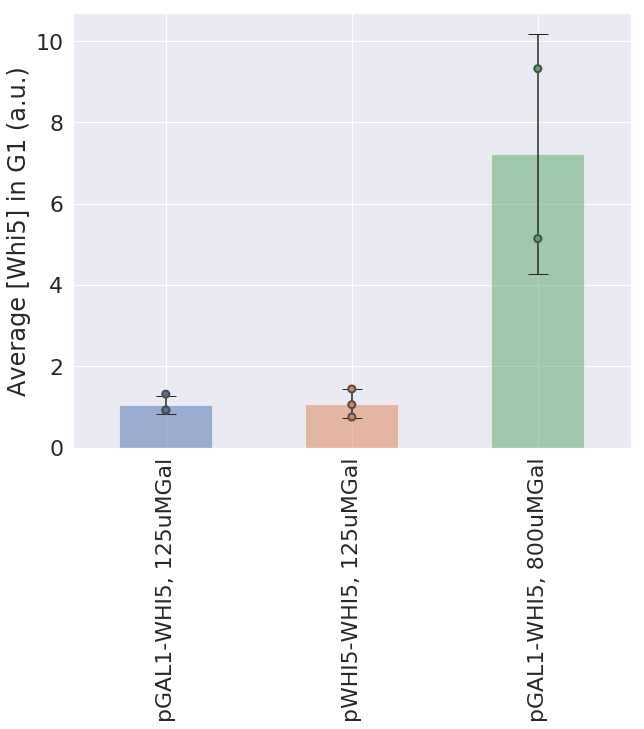

<Figure size 432x288 with 0 Axes>

In [37]:
x=df1.Condition!='pWHI5-WHI5, 800uMGal'
df2 = df1[x].groupby(['Condition', 'expt_id']).mean()
# print df1.groupby(['Condition', 'expt_id'])['pixel_thresh_fluor_vals_av'].mean()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
var= 'pixel_thresh_fluor_vals_av'
temp_df=df2[var].groupby('Condition').mean()
temp_df1=df2[var].groupby('Condition').std(ddof=1)
ordering = ['pGAL1-WHI5, 125uMGal', 'pWHI5-WHI5, 125uMGal', 'pGAL1-WHI5, 800uMGal']
g = sns.stripplot(x='Condition', y=var, data=df2.reset_index(), size=7, jitter=False, linewidth=2.0, order=ordering)
current_palette = sns.color_palette()
labels = ['$P_{GAL1}-WHI5$,\n 125$\mu$M Gal', '$P_{GAL1}-WHI5$,\n 800$\mu$M Gal', '$P_{WHI5}-WHI5$,\n125$\mu$M Gal']
temp_df[[0,2,1]].plot(x='Condition',kind='bar',yerr=temp_df1[[0,2,1]],capsize=10.0, figsize=[10,8],grid=True, alpha=.5,color=current_palette[:3])
# g.set_xticklabels(labels, rotation=0)
plt.ylabel('Average [Whi5] in G1 (a.u.)')
plt.xlabel('')
plt.show()
fig.savefig('/mnt/c/Users/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c1_G1_bar_timepoint_variable_gal.png',dpi=500, bbox_inches='tight')
plt.clf()

## (C)

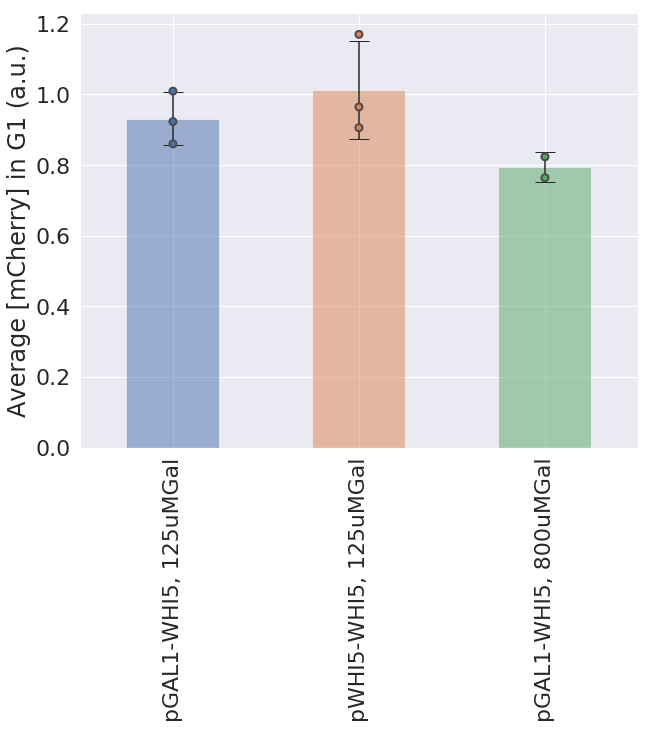

<Figure size 432x288 with 0 Axes>

In [38]:
x=df1.Condition!='pWHI5-WHI5, 800uMGal'
df2 = df1[x].groupby(['Condition', 'expt_id']).mean()
# print df1.groupby(['Condition', 'expt_id'])['pixel_thresh_fluor_vals_av'].mean()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
var= 'pixel_thresh_fluor_vals_av_c2'
temp_df=df2[var].groupby('Condition').mean()
temp_df1=df2[var].groupby('Condition').std(ddof=1)
ordering = ['pGAL1-WHI5, 125uMGal', 'pWHI5-WHI5, 125uMGal', 'pGAL1-WHI5, 800uMGal']
g = sns.stripplot(x='Condition', y=var, data=df2.reset_index(), size=7, jitter=False, linewidth=2.0, order=ordering)
labels = ['$P_{GAL1}-WHI5$,\n 125$\mu$M Gal', '$P_{GAL1}-WHI5$,\n 800$\mu$M Gal', '$P_{WHI5}-WHI5$,\n125$\mu$M Gal']
temp_df[[0,2,1]].plot(kind='bar',yerr=temp_df1[[0,2,1]],capsize=10.0, figsize=[10,8],grid=True, alpha=.5,color=current_palette[:3])
# g.set_xticklabels(labels, rotation=0)
plt.ylabel('Average [mCherry] in G1 (a.u.)')
plt.xlabel('')
plt.show()
fig.savefig('/mnt/c/Users/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c2_G1_bar_timepoint_variable_gal.png',dpi=500, bbox_inches='tight')
plt.clf()

## (D)

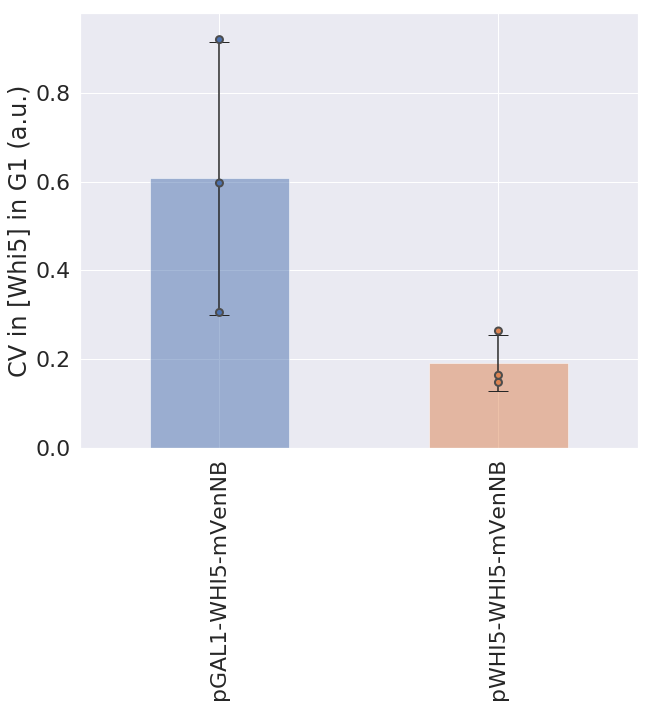

<Figure size 432x288 with 0 Axes>

In [36]:

x=df1.gal_conc=='125uMGal'
y=df1.ellipse_volume<200  # ensuring that we aren't studying cells that are arrested in G1
df2 = df1[x&y].groupby(['genotype', 'expt_id']).std()/df1[x&y].groupby(['genotype', 'expt_id']).mean()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
var= 'pixel_thresh_fluor_vals_av'
temp_df=df2[var].groupby('genotype').mean()
temp_df1=df2[var].groupby('genotype').std(ddof=1)
g = sns.stripplot(x='genotype', y=var, data=df2.reset_index(), size=7, jitter=False, linewidth=2.0)
labels = ['$P_{GAL1}-WHI5$', '$P_{WHI5}-WHI5$']
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
# g.set_xticklabels(labels, rotation=0)
plt.ylabel('CV in [Whi5] in G1 (a.u.)')
plt.xlabel('')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/timepoint_G1_CV_F1conc_bar.png',dpi=500, bbox_inches='tight')
plt.show()
plt.clf()

## (E)

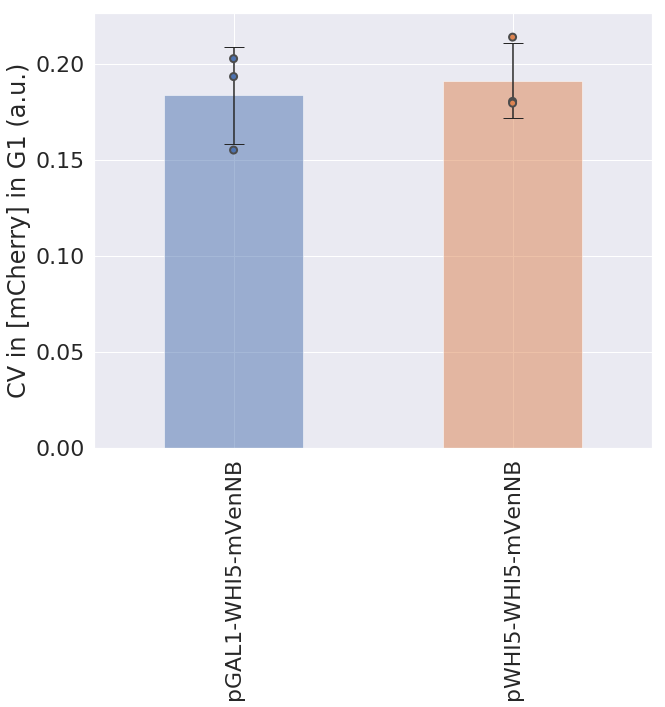

<Figure size 432x288 with 0 Axes>

In [37]:
x=df1.gal_conc=='125uMGal'
y=df1.ellipse_volume<200  # ensuring that we aren't studying cells that are arrested in G1
df2 = df1[x&y].groupby(['genotype', 'expt_id']).std()/df1[x&y].groupby(['genotype', 'expt_id']).mean()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
var= 'pixel_thresh_fluor_vals_av_c2'
temp_df=df2[var].groupby('genotype').mean()
temp_df1=df2[var].groupby('genotype').std(ddof=1)
g = sns.stripplot(x='genotype', y=var, data=df2.reset_index(), size=7, jitter=False, linewidth=2.0)
labels = ['$P_{GAL1}-WHI5$', '$P_{WHI5}-WHI5$']
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
# g.set_xticklabels(labels, rotation=0)
plt.ylabel('CV in [mCherry] in G1 (a.u.)')
plt.xlabel('')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/timepoint_G1_CV_F2conc_bar.png',dpi=500, bbox_inches='tight')
plt.show()
plt.clf()

## Figure S3

## (E)

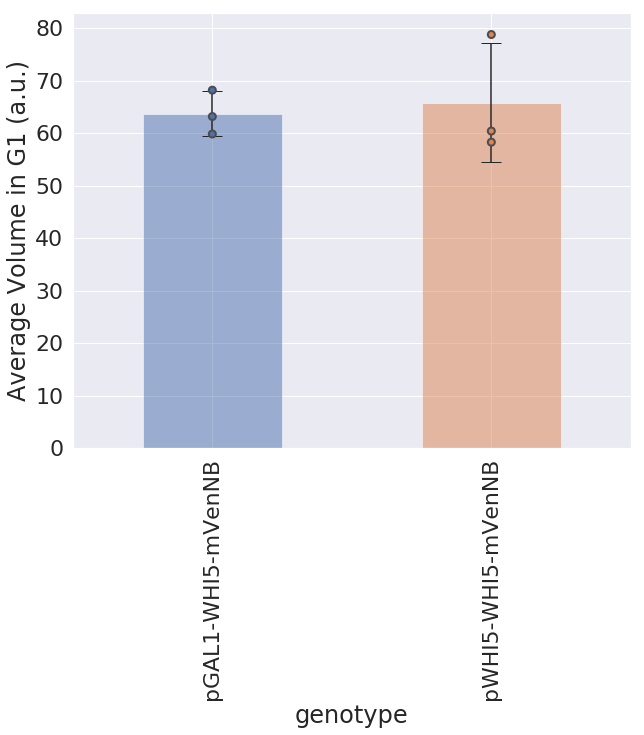

<Figure size 432x288 with 0 Axes>

In [38]:
x=df1.gal_conc=='125uMGal'
y=df1.ellipse_volume<200  # ensuring that we aren't studying cells that are arrested in G1
df2 = df1[x&y].groupby(['genotype', 'expt_id']).mean()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
var= 'ellipse_volume'
temp_df=df2[var].groupby('genotype').mean()
temp_df1=df2[var].groupby('genotype').std(ddof=1)
g = sns.stripplot(x='genotype', y=var, data=df2.reset_index(), size=7, jitter=False, linewidth=2.0)
labels = ['$P_{GAL1}-WHI5$', '$P_{WHI5}-WHI5$']
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
# g.set_xticklabels(labels, rotation=0)
plt.ylabel('Average Volume in G1 (a.u.)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/timepoint_G1_volume_bar.png',dpi=500, bbox_inches='tight')
plt.show()
plt.clf()

## (F)

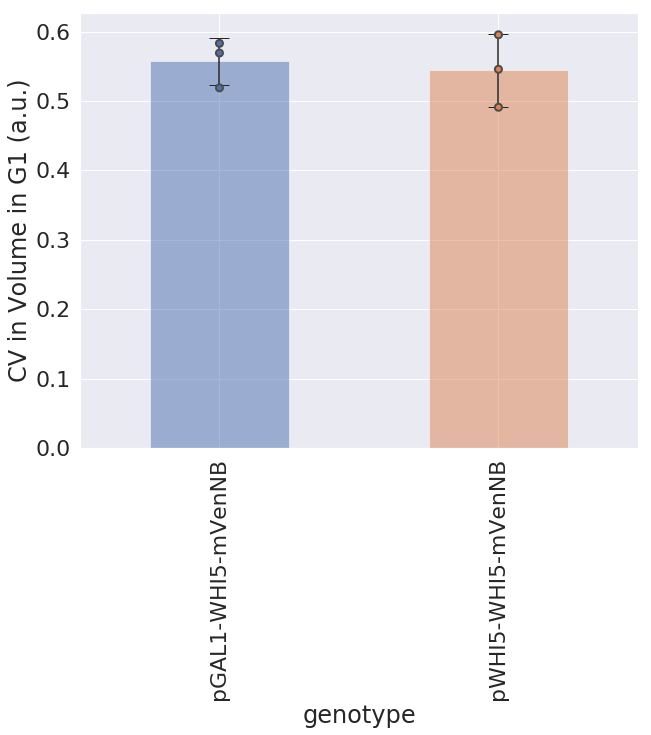

<Figure size 432x288 with 0 Axes>

In [33]:
x=df1.gal_conc=='125uMGal'
y=df1.ellipse_volume<200  # ensuring that we aren't studying cells that are arrested in G1
temp_df2 = df1[x&y].groupby(['genotype', 'expt_id'])
df2=temp_df2.std()/temp_df2.mean()
sns.set(font_scale=2)
fig=plt.figure(figsize=[5,5])
var= 'ellipse_volume'
temp_df=df2[var].groupby('genotype').mean()
temp_df1=df2[var].groupby('genotype').std(ddof=1)
g = sns.stripplot(x='genotype', y=var, data=df2.reset_index(), size=7, jitter=False, linewidth=2.0)
labels = ['$P_{GAL1}-WHI5$', '$P_{WHI5}-WHI5$']
temp_df.plot(kind='bar',yerr=temp_df1,capsize=10.0, figsize=[10,8],grid=True, alpha=.5)
# g.set_xticklabels(labels, rotation=0)
plt.ylabel('CV in Volume in G1 (a.u.)')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/timepoint_G1_volume_CV_bar.png',dpi=500, bbox_inches='tight')
plt.show()
plt.clf()